<a href="https://colab.research.google.com/github/BSA-projects/data-science-portfolio/blob/main/labubu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install pytrends


In [31]:
from pytrends.request import TrendReq

connecting to google trends, setting timezone to EST

In [32]:
pytrends = TrendReq(hl='en-US', tz=360)

In [33]:
kw_list = ["labubu"]

defining keyword
build_payload() func preps the request
timeframe sets up how far back you want to look

In [34]:
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

interest_over_time() func gives table of how many ppl searched for that keyword

In [35]:
data = pytrends.interest_over_time()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [36]:
data.head(5)

,labubu,isPartial
date,,
2024-08-11,4,False
2024-08-18,3,False
2024-08-25,4,False
2024-09-01,4,False
2024-09-08,5,False


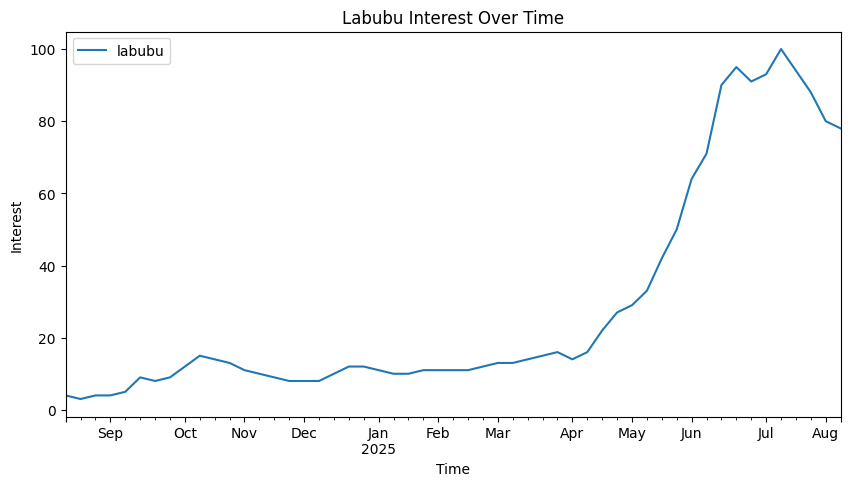

In [37]:
import matplotlib.pyplot as plt

data[kw_list].plot(figsize=(10,5), title='Labubu Interest Over Time')
plt.ylabel('Interest')
plt.xlabel('Time')
plt.show()

the numbers you see are not actual search vol numbers, they are relative to each other, meaning that 100 is the peak, 50 is when it was half as popular, and 0 means there wasn't enough data

now let's analyze by region

In [38]:
pytrends.build_payload(kw_list, timeframe='today 3-m')

In [39]:
data_by_region = pytrends.interest_by_region()

In [40]:
top_regions = data_by_region.sort_values(by=kw_list, ascending=False).head(20)

In [41]:
print("Top 20 Regions Interested in Labubu")
print(top_regions[kw_list])

Top 20 Regions Interested in Labubu
                      labubu
geoName                     
Poland                   100
Slovakia                  96
Czechia                   87
United Arab Emirates      82
Hong Kong                 81
Lithuania                 80
Romania                   75
Cyprus                    74
Hungary                   74
Australia                 72
Netherlands               70
United States             68
Estonia                   68
Sweden                    66
United Kingdom            65
Latvia                    62
Croatia                   61
Bosnia & Herzegovina      61
Lebanon                   58
Serbia                    55


In [43]:
related_queries = pytrends.related_queries()
related_queries['labubu']['top']

,query,value
0,labubu doll,100
1,labubu original,46
2,labubu pop,40
3,popmart labubu,38
4,popmart,37
5,labubu pop mart,32
6,pop mart,31
7,labubu price,29
8,big energy labubu,22
9,real labubu,22


In [44]:
related_queries['labubu']['rising']

,query,value
0,labubu pazuzu,49700
1,pazuzu,49450
2,ksi,7050
3,labubu doll price in india,5000
4,24k gold labubu,3750
5,ksi labubu,2900
6,24 karat gold labubu,2550
7,labubu äkta,1750
8,labubu nedir,1450
9,labubu oyuncak,1250


analyze the US

In [47]:
!pip install us ## necessary to rename each state to its abbreviation
import us
import plotly.graph_objects as go

In [61]:
pytrends.build_payload(kw_list, timeframe='today 3-m', geo='US')

In [62]:
region_data = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)

In [63]:
region_data = region_data.reset_index()

region_data.columns = ['State', 'Search Interest']
region_data = region_data.sort_values(by='Search Interest', ascending=False)

In [64]:
region_data.head()

,State,Search Interest
11,Hawaii,100
4,California,91
28,Nevada,86
30,New Jersey,67
31,New Mexico,65


In [68]:
region_data['code'] = region_data['State'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

In [69]:
region_data.head()

,State,Search Interest,code
11,Hawaii,100,HI
4,California,91,CA
28,Nevada,86,NV
30,New Jersey,67,NJ
31,New Mexico,65,NM


In [70]:
fig = go.Figure(data=go.Choropleth(
    locations=region_data['code'],
    z = region_data['Search Interest'],
    locationmode = 'USA-states',
    colorscale = 'YlGnBU',
    colorbar_title = 'Interest',
))

fig.update_layout(
    title_text = 'Labubu Interest by State',
    geo_scope='usa',
)

fig.show()


In [120]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["sonny angel"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



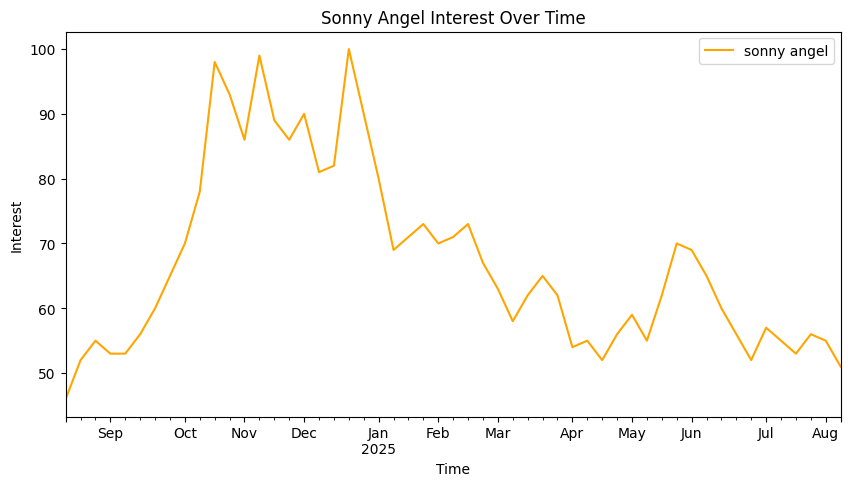

In [123]:
df = pytrends.interest_over_time()

df[kw_list].plot(figsize=(10,5), title='Sonny Angel Interest Over Time', color="orange")
plt.ylabel('Interest')
plt.xlabel('Time')
plt.show()